# Binary Logistic Regression: Explanation and Code Walkthrough

## 1. What is Binary Logistic Regression?
Binary logistic regression is a statistical method used for predicting a binary outcome (two possible classes, e.g., pass/fail, yes/no) based on one or more predictor variables. It models the probability that a given input belongs to a particular class using the logistic (sigmoid) function, which outputs values between 0 and 1.

## 2. Code Overview and Section Explanations
This notebook demonstrates how to use binary logistic regression to predict whether a student passes or fails based on their marks. The code is divided into several sections:
- **Importing Libraries**: Loads required Python packages for data manipulation, modeling, and visualization.
- **Creating the Dataset**: Defines a simple dataset with marks and pass/fail results.
- **Feature and Label Selection**: Separates input features and target labels.
- **Model Training**: Fits the logistic regression model to the data.
- **Prediction**: Uses the trained model to predict outcomes for both training data and a new test case.
- **Evaluation**: Calculates accuracy and confusion matrix to assess model performance.
- **Visualization**: Plots the logistic curve and confusion matrix for better understanding.

## 3. Why Certain Things Are Written in a Certain Way
- **DataFrame Usage**: `pd.DataFrame` is used to organize data in tabular form, making it compatible with scikit-learn functions.
- **Feature Names**: Features are selected as `X = data[['Marks']]` to ensure the model knows the column name, which helps avoid warnings during prediction.
- **Test Data as DataFrame**: `test_marks = pd.DataFrame({'Marks': [58]})` ensures consistency with training data.
- **Function Arguments**: Functions like `model.fit(X, y)` require the feature matrix and labels as arguments. The shape and type of these arguments must match what the model expects.

## 4. Explanation of Each Section of Code
- `import pandas as pd`, `import numpy as np`, etc.: Import necessary libraries for data handling, modeling, and plotting.
- `data = pd.DataFrame({...})`: Creates the dataset with marks and results.
- `X = data[['Marks']]`, `y = data['Result']`: Selects features and labels.
- `model = LogisticRegression()`: Initializes the logistic regression model.
- `model.fit(X, y)`: Trains the model using the data.
- `y_pred = model.predict(X)`: Predicts outcomes for training data.
- `test_marks = pd.DataFrame({'Marks': [58]})`: Prepares test data in the same format as training data.
- `test_pred = model.predict(test_marks)`, `test_prob = model.predict_proba(test_marks)[0][1]`: Predicts class and probability for the test case.
- `accuracy_score(y, y_pred)`, `confusion_matrix(y, y_pred)`: Evaluates model performance.
- Plotting functions (`plt.figure`, `plt.scatter`, etc.): Visualize results and model behavior.
- `sns.heatmap(...)`: Plots the confusion matrix for easy interpretation.

## 5. Bracket Usage in Python Functions
- **Parentheses `()`**: Used for function calls and grouping expressions, e.g., `model.fit(X, y)`.
- **Square Brackets `[]`**: Used for indexing, slicing, and selecting columns in DataFrames, e.g., `data['Marks']` or `data[['Marks']]`. Double brackets return a DataFrame, single brackets return a Series.
- **Curly Braces `{}`**: Used for defining dictionaries, e.g., `{'Marks': [58]}`.

### How to Decide Which Bracket to Use
- Use `()` when calling functions or methods: `function_name(arguments)`
- Use `[]` for accessing elements in lists, arrays, or DataFrames: `list[index]`, `df['column']`
- Use `{}` when creating dictionaries: `{'key': value}`
If unsure, check the documentation for the function or object you are working with.

---
This notebook provides a step-by-step guide to binary logistic regression, including code explanations and best practices for writing and understanding Python code in machine learning workflows.

## Additional Explanations: Probability Prediction and Plotting Logistic Curve

### 1. Does `predict_proba` Use the Sigmoid Function? Why `[0][1]`?
- The `predict_proba` function in scikit-learn's `LogisticRegression` uses the sigmoid (logistic) function to calculate the probability that a sample belongs to each class. For binary classification, it returns a 2D array:
    - The first column `[0]` is the probability of class 0 (e.g., Fail).
    - The second column `[1]` is the probability of class 1 (e.g., Pass).
- When you write `predict_proba(test_marks)[0][1]`, it means:
    - `[0]`: Selects the first (and only) row, corresponding to your test sample.
    - `[1]`: Selects the probability for class 1 (Pass).
- The sigmoid function is used internally to map the linear combination of input features to a probability between 0 and 1.

### 2. Explanation of Each Line in the Logistic Curve Plotting Section

```python
x_vals = np.linspace(20, 100, 200).reshape(-1, 1)
y_probs = model.predict_proba(x_vals)[:, 1]
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Training Data (Pass/Fail)')
plt.plot(x_vals, y_probs, color='red', label='Logistic Curve')
plt.axhline(0.5, linestyle='--', color='gray', label='Decision Threshold')
plt.scatter(test_marks, test_prob, color='green', s=100, label='Test (58 marks)')
plt.title('Logistic Regression: Marks vs Pass Probability')
plt.xlabel('Marks')
plt.ylabel('Probability of Passing')
plt.legend()
plt.grid(True)
plt.savefig('logistic_pass_fail.png')
plt.show()
```

**Line-by-line explanation:**
- `x_vals = np.linspace(20, 100, 200).reshape(-1, 1)`
    - Creates 200 evenly spaced values between 20 and 100 (possible marks).
    - `.reshape(-1, 1)` converts the array to a column vector, matching the shape expected by the model.
- `y_probs = model.predict_proba(x_vals)[:, 1]`
    - Predicts the probability of passing (class 1) for each value in `x_vals`.
    - `[:, 1]` selects the probability for class 1 from the output array.
- `plt.figure(figsize=(8,5))`
    - Creates a new figure for plotting, with a size of 8 inches by 5 inches.
- `plt.scatter(X, y, color='blue', label='Training Data (Pass/Fail)')`
    - Plots the original training data points as blue dots.
    - `X` is the marks, `y` is the result (0 or 1).
    - `label` is used for the legend.
- `plt.plot(x_vals, y_probs, color='red', label='Logistic Curve')`
    - Plots the logistic regression curve (predicted probability of passing) as a red line.
    - `x_vals` on the x-axis, `y_probs` on the y-axis.
- `plt.axhline(0.5, linestyle='--', color='gray', label='Decision Threshold')`
    - Draws a horizontal dashed line at y=0.5, showing the decision threshold for classification.
- `plt.scatter(test_marks, test_prob, color='green', s=100, label='Test (58 marks)')`
    - Plots the test mark (58) and its predicted probability as a large green dot.
    - `s=100` sets the marker size.
- `plt.title('Logistic Regression: Marks vs Pass Probability')`
    - Sets the plot title.
- `plt.xlabel('Marks')` and `plt.ylabel('Probability of Passing')`
    - Label the x-axis and y-axis.
- `plt.legend()`
    - Displays the legend for all labeled plot elements.
- `plt.grid(True)`
    - Adds a grid to the plot for easier reading.
- `plt.savefig('logistic_pass_fail.png')`
    - Saves the plot as a PNG image file.
- `plt.show()`
    - Displays the plot in the notebook.

**Arguments Used:**
- `color`: Sets the color of plot elements.
- `label`: Sets the label for the legend.
- `figsize`: Sets the figure size.
- `linestyle`: Sets the style of lines (e.g., dashed).
- `s`: Sets the size of scatter plot markers.

This section visualizes how the logistic regression model predicts the probability of passing for different marks, highlights the training data, the decision threshold, and the test case.

## Explanation of the Multi-Sample Prediction and Plotting Code
This section demonstrates how to use logistic regression to predict the probability of passing for multiple test samples and visualize the results.

### Step-by-Step Explanation:

**Step 1: Create the test samples**
```python
test_marks = pd.DataFrame({'Marks' : [58, 20, 98]})
```
- Creates a DataFrame with three test samples (marks: 58, 20, 98).
- Using a DataFrame ensures compatibility with the trained model and preserves feature names.

**Step 2: Predict classes and probabilities**
```python
test_pred = model.predict(test_marks)
test_prob = model.predict_proba(test_marks)
```
- `model.predict(test_marks)`: Predicts the class (0 or 1) for each test sample.
- `model.predict_proba(test_marks)`: Returns a 2D array of probabilities for each sample:
    - Each row corresponds to a sample.
    - First column: Probability of class 0 (Fail).
    - Second column: Probability of class 1 (Pass).

**Step 3: Print results for each sample**
```python
for i in range(len(test_marks)):
    print(f"Predicted Probability for Marks {test_marks.iloc[i, 0]}:")
    print(f"  Class 0 (Fail): {test_prob[i][0]:.2f}")
    print(f"  Class 1 (Pass): {test_prob[i][1]:.2f}")
```
- Loops through each test sample.
- Prints the predicted probability for both classes for each mark.
- `test_marks.iloc[i, 0]` gets the mark value for the i-th sample.
- `test_prob[i][0]` and `test_prob[i][1]` get the probabilities for class 0 and class 1, respectively.

**Step 4: Plot the logistic curve and test points**
```python
plt.scatter(test_marks['Marks'], test_prob[:, 1], color='green', s=100, label='Test Marks')
```
- Plots the test marks on the logistic curve using their predicted probability of passing (class 1).
- `test_marks['Marks']`: The x-values (marks) for the test samples.
- `test_prob[:, 1]`: The y-values (probability of passing) for each sample.
- `color='green'`, `s=100`: Green color and large marker size for visibility.
- `label='Test Marks'`: Label for the legend.

**Summary:**
- This code allows you to predict and visualize the probability of passing for any number of test samples.
- The results are printed for each sample and plotted on the logistic curve for clear interpretation.
- The approach is robust and generalizes to any number of test samples, making it useful for batch predictions and analysis.

### Detailed Explanation: `x_vals = np.linspace(20, 100, 200).reshape(-1, 1)`
- `np.linspace(20, 100, 200)` generates 200 evenly spaced values between 20 and 100. These represent possible marks for students, covering the full range of interest for the model.
- `.reshape(-1, 1)` converts the 1D array into a 2D column vector (shape: 200 rows, 1 column). This is required because scikit-learn expects the input features to be in a 2D array (even if there is only one feature).
- The result, `x_vals`, is used to compute predicted probabilities for a smooth curve across the entire marks range, not just the training or test points.

### Why Plot Only Probability of Passing (Class 1) on the Y-Axis?
- In binary logistic regression, each sample has two probabilities:
    - Probability of class 0 (Fail)
    - Probability of class 1 (Pass)
- These probabilities always sum to 1 for each sample: $P(\text{Fail}) + P(\text{Pass}) = 1$
- Plotting the probability of passing (class 1) on the y-axis is most useful because:
    - It directly answers the main question: "What is the chance of passing for a given mark?"
    - The probability of failing is simply $1 - P(\text{Pass})$, so plotting both would be redundant.
    - The logistic curve (sigmoid function) visually shows how the probability of passing changes with marks.
- If you plotted only the probability (without specifying the class), it would be unclear which class the probability refers to. In practice, you plot the probability for the class of interest (here, passing).
- This approach makes the plot easy to interpret: higher marks lead to higher probability of passing, as shown by the curve.

Test Marks: 58, 20, 98
Predicted class for each sample: [1 0 1]
Predicted Probability for Marks 58:
  Class 0 (Fail): 0.02
  Class 1 (Pass): 0.98
Predicted Probability for Marks 20:
  Class 0 (Fail): 1.00
  Class 1 (Pass): 0.00
Predicted Probability for Marks 98:
  Class 0 (Fail): 0.00
  Class 1 (Pass): 1.00

Accuracy: 100.00%
Confusion Matrix:
[[4 0]
 [0 8]]


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


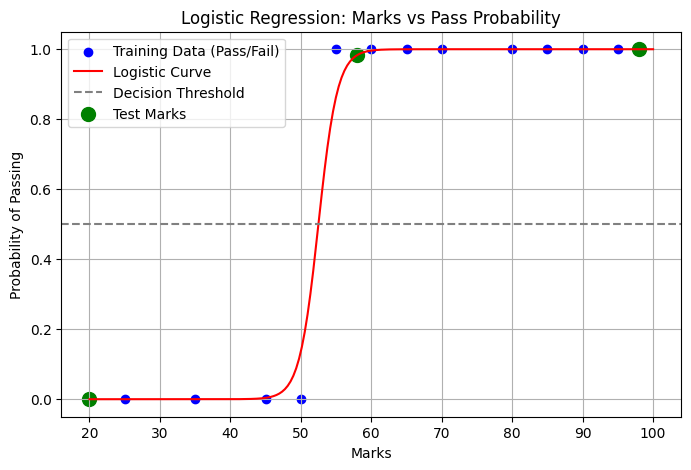

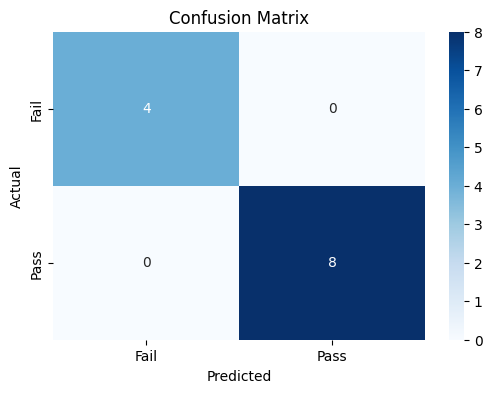

In [27]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create dataset
data = pd.DataFrame({
    'Marks': [25, 35, 45, 50, 55, 60, 65, 70, 80, 85, 90, 95],
    'Result': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
})

# Step 2: Features and labels
X = data[['Marks']] # Feature matrix
y = data['Result'] # Labels

# Step 3: Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 4: Model predictions on training data
y_pred = model.predict(X)

# Step 5: Predict on multiple test cases (e.g., 58, 20, 98 marks)
test_marks = pd.DataFrame({'Marks' : [58, 20, 98]})
test_pred = model.predict(test_marks)
test_prob = model.predict_proba(test_marks)

print(f"Test Marks: 58, 20, 98")
print(f"Predicted class for each sample: {test_pred}")
for i in range(len(test_marks)):
    print(f"Predicted Probability for Marks {test_marks.iloc[i, 0]}:")
    print(f"  Class 0 (Fail): {test_prob[i][0]:.2f}")
    print(f"  Class 1 (Pass): {test_prob[i][1]:.2f}")

# Step 6: Evaluate model
acc = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
print(f"\nAccuracy: {acc*100:.2f}%")
print("Confusion Matrix:")
print(cm)

# Step 7: Plot logistic curve with test points
x_vals = np.linspace(20, 100,200).reshape(-1, 1)
y_probs = model.predict_proba(x_vals)[:, 1]
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Training Data (Pass/Fail)')
plt.plot(x_vals, y_probs, color='red', label='Logistic Curve')
plt.axhline(0.5, linestyle='--', color='gray', label='Decision Threshold')
plt.scatter(test_marks['Marks'], test_prob[:, 1], color='green', s=100, label='Test Marks')
plt.title('Logistic Regression: Marks vs Pass Probability')
plt.xlabel('Marks')
plt.ylabel('Probability of Passing')
plt.legend()
plt.grid(True)
#plt.savefig('logistic_pass_fail.png')
plt.show()

# Step 8: Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig('confusion_matrix.png')
plt.show()